In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Task

In [6]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Instacart Basket Analysis'

In [7]:
# ords_prods_cust stands for orders_products_customers
ords_prods_cust= pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_with_frequency_columns2.pkl'))

In [8]:
ords_prods_cust.head()

,user_id,Surname,Gender,STATE,Age,date_joined,Family Members,Family status,Income,order_id,...,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,price_flag,median_order_frequency,order_frequency_flag,_merge
0,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,...,Mid-range product,Regularly busy,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
1,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Mid-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
2,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Low-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
3,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,...,Mid-range product,Slowest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both
4,26711,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,...,Mid-range product,Busiest days,Most orders,9.0,New customer,8.205882,Low spender,20.0,Regular customer,both


# 2. Task

In [9]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30563157 entries, 0 to 30563156
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   Surname                 object  
 2   Gender                  object  
 3   STATE                   object  
 4   Age                     int64   
 5   date_joined             object  
 6   Family Members          int64   
 7   Family status           object  
 8   Income                  int64   
 9   order_id                int64   
 10  eval_set                object  
 11  order_number            float64 
 12  orders_day_of_week      float64 
 13  order_time              float64 
 14  days_since_prior_order  float64 
 15  product_id              float64 
 16  add_to_cart_order       float64 
 17  reordered               float64 
 18  product_name            object  
 19  aisle_id                float64 
 20  department_id           float64 
 21  prices

Because of the column surname with my dataset can be traced back to a particular person, I'm working with PII. I would inform e.g. a senior colleague.

In [10]:
#drop the Surname column
ords_prods_cust.drop(columns = ['Surname'], inplace = True)

In [11]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30563157 entries, 0 to 30563156
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   Gender                  object  
 2   STATE                   object  
 3   Age                     int64   
 4   date_joined             object  
 5   Family Members          int64   
 6   Family status           object  
 7   Income                  int64   
 8   order_id                int64   
 9   eval_set                object  
 10  order_number            float64 
 11  orders_day_of_week      float64 
 12  order_time              float64 
 13  days_since_prior_order  float64 
 14  product_id              float64 
 15  add_to_cart_order       float64 
 16  reordered               float64 
 17  product_name            object  
 18  aisle_id                float64 
 19  department_id           float64 
 20  prices                  float64 
 21  price_

# 3. Task

In [12]:
# printing the frequency of the “STATE” 
ords_prods_cust['STATE'].value_counts(dropna = False)

Pennsylvania            630658
California              624031
Rhode Island            620755
Georgia                 620242
New Mexico              617947
Arizona                 617739
Oklahoma                615491
North Carolina          615444
Alaska                  611941
Minnesota               611551
Massachusetts           610663
Wyoming                 607931
Virginia                605682
Missouri                604614
Texas                   604199
Colorado                603712
Maine                   602295
North Dakota            601916
Alabama                 601401
Louisiana               601069
South Carolina          600939
Delaware                600933
Kansas                  600853
Nevada                  599850
Arkansas                599690
Oregon                  599622
New York                599606
Montana                 599039
Washington              597957
South Dakota            597296
Hawaii                  596724
Illinois                596542
Kentucky

In [13]:
result = []

for value in ords_prods_cust["STATE"]:
  if value == 'Pennsylvania' or value == 'Maine'or value == 'New Hampshire' or value =='Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append("Midwest")  
  elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
    result.append("West")  
  else:
    result.append("South")

In [14]:
# create a new column and set it equal to result
ords_prods_cust['Regions'] = result

In [15]:
ords_prods_cust['Regions'].value_counts()

South        10177956
West          7824879
Midwest       7162329
Northeast     5397993
Name: Regions, dtype: int64

In [16]:
# change type to category
ords_prods_cust['Regions'] = ords_prods_cust['Regions'].astype('category')

In [17]:
# create crosstab
crosstab = pd.crosstab(ords_prods_cust['Regions'], ords_prods_cust['price_flag'], dropna = False)

In [18]:
crosstab.to_clipboard()

In [19]:
crosstab

price_flag,High spender,Low spender
Regions,,
Midwest,149866,7012463
Northeast,103985,5294008
South,199342,9978614
West,151574,7673305


 # 4. Task

In [20]:
#create a new dataframe without customers with less than 5 orders
ords_prods_cust_clean = ords_prods_cust[ords_prods_cust['max_order'] >=5]

In [21]:
ords_prods_cust_clean.shape

(30079537, 32)

In [22]:
# check new dataset 
ords_prods_cust_clean['max_order'].value_counts().sort_index()

5.0       586326
6.0       651437
7.0       690968
8.0       700717
9.0       721344
          ...   
96.0       59248
97.0       40115
98.0       44522
99.0       44176
100.0    1159816
Name: max_order, Length: 96, dtype: int64

# 5. Task

Age

In [23]:
ords_prods_cust_clean['Age'].value_counts().sort_index()

18    464622
19    481767
20    466541
21    476087
22    477417
       ...  
77    464108
78    458149
79    494239
80    479030
81    472524
Name: Age, Length: 64, dtype: int64

In [24]:
 result2 = []

for value in ords_prods_cust_clean['Age']:
    if value < 20:
        result2.append('20 or less')     
    elif value >=20 and value < 30:
         result2.append('20-30')     
    elif value >= 30 and value < 40:
         result2.append('30-40')
    elif value >= 40 and value < 50:
         result2.append('40-50')
    elif value >= 50 and value < 60:
         result2.append('50-60')    
    elif value >= 60 and value < 70:
        result2.append('60-70')
    else:
         result2.append('over 70')

In [25]:
# create new column to the dataframe
ords_prods_cust_clean['Age_Groups'] = result2

<ipython-input-25-de6a3ee872d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_clean['Age_Groups'] = result2


In [26]:
# change type to category
ords_prods_cust_clean['Age_Groups'] = ords_prods_cust_clean['Age_Groups'].astype('category')

<ipython-input-26-eda88c26c366>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_clean['Age_Groups'] = ords_prods_cust_clean['Age_Groups'].astype('category')


In [163]:
pd.options.display.max_columns = None

In [164]:
#Age Group/time
crosstab_age_time = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['order_time'], dropna = False)

In [165]:
crosstab_age_time.to_clipboard()

In [166]:
crosstab_age_time

order_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Age_Groups,,,,,,,,,,,,,,,,,,,,,,,,
20 or less,6907,3724,2448,1676,1898,3014,10383,27897,50951,70540,78368,79789,77059,78912,77700,77447,73672,60472,46781,35601,27508,22340,18388,12914
20-30,31483,17037,10102,7368,7656,13006,43443,131995,250389,361353,408103,401193,376605,383289,392575,386640,368748,300558,229137,180859,142650,114836,92174,55494
30-40,32759,16985,10119,7639,7597,12217,42581,128551,251241,360075,406066,399554,379961,388612,392050,389539,364993,296157,236372,178980,139523,116128,94788,58164
40-50,32420,17257,10343,7509,6943,12354,41495,126481,255993,361714,403307,403972,385577,391542,393050,387543,366168,307943,241930,182777,142510,115088,91490,59505
50-60,31016,16664,8844,6937,7216,12514,43152,135197,253576,361120,402306,396734,376413,381844,385455,386213,366069,301452,234329,179826,143054,118123,92328,59632
60-70,30550,15631,9396,6848,8694,13258,40523,129727,246382,348920,392380,387430,373109,382341,385114,382291,366433,297729,231829,180479,137533,113946,86935,57474
over 70,36106,19641,12166,9518,8825,15864,52277,161241,306045,433265,484871,474762,452922,458934,470594,455625,436288,360632,285029,220206,169827,140108,111825,69356


In [30]:
#Age Group/day of week
crosstab_age_day = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['orders_day_of_week'], dropna = False)

In [31]:
crosstab_age_day.to_clipboard()

In [32]:
crosstab_age_day

orders_day_of_week,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Age_Groups,,,,,,,
20 or less,177534,169183,122101,112201,110536,124691,130143
20-30,900529,822007,611288,554564,551834,614259,652212
30-40,900945,836352,606440,561154,558187,614345,633228
40-50,901638,823221,621146,562325,555365,618965,662251
50-60,893883,823520,617631,554735,548550,609876,651819
60-70,873911,803884,602986,553922,546013,603434,640802
over 70,1080536,977525,730555,673915,658482,740538,784376


In [167]:
#Age Group/department
crosstab_age_department = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['department_id'], dropna = False)

In [168]:
crosstab_age_department.to_clipboard()

In [169]:
crosstab_age_department

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Age_Groups,,,,,,,,,,,,,,,,,,,,,
20 or less,64368,1109,33269,273867,5655,8017,76989,2890,25561,1036,13262,21320,54114,20518,30879,157573,22121,12560,82456,29969,2196
20-30,318211,5497,169802,1368008,21094,38921,384619,14590,124560,5144,63384,100682,268125,103022,154727,784623,103652,62621,420791,151280,10487
30-40,316164,5067,169497,1380736,22680,38385,383074,13179,122995,5026,62987,100654,267769,100061,151969,788968,104935,61869,420619,151498,10033
40-50,320649,5120,170342,1382721,21548,39331,392831,13940,123650,5261,65534,102363,271440,102257,153144,791385,106730,64794,415507,152566,10605
50-60,320045,5278,169414,1364783,21730,38360,392715,14276,125126,4861,65171,101385,268761,100934,153560,773009,104987,61319,421062,150177,9987
60-70,317307,5248,166153,1353651,20573,37271,380838,14285,121442,5055,62950,101434,266073,97752,150571,761194,103747,60862,406207,149788,9934
over 70,383993,5991,202501,1643084,24924,45757,472630,16435,148145,6037,75454,122840,321301,121526,181427,939369,127960,73145,501352,180873,12027


In [39]:
#Age Group/familiy status
crosstab_age_familiy_status = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['Family status'], dropna = False)

In [40]:
crosstab_age_familiy_status.to_clipboard()

In [41]:
crosstab_age_familiy_status

Family status,divorced/widowed,living with parents and siblings,married,single
Age_Groups,,,,
20 or less,0,728404,0,217985
20-30,0,712223,2808076,1186394
30-40,0,0,3532914,1177737
40-50,0,0,3567397,1177514
50-60,0,0,3514224,1185790
60-70,1171072,0,3453880,0
over 70,1401570,0,4244357,0


In [42]:
#Age Group/loyalty_flag

In [43]:
crosstab_age_loyalty_flag = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['loyalty_flag'], dropna = False)

In [44]:
crosstab_age_loyalty_flag.to_clipboard()

In [45]:
crosstab_age_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
Age_Groups,,,
20 or less,323504,127213,495672
20-30,1623374,640593,2442726
30-40,1637862,627985,2444804
40-50,1658842,639607,2446462
50-60,1644354,644837,2410823
60-70,1624688,631642,2368622
over 70,1968422,768577,2908928


Income

In [46]:
ords_prods_cust_clean['Income'].value_counts().sort_index()

25903      19
25911      25
25937      35
25941      28
25955     390
         ... 
584097    816
590790     42
591089    171
592409    288
593901    623
Name: Income, Length: 101938, dtype: int64

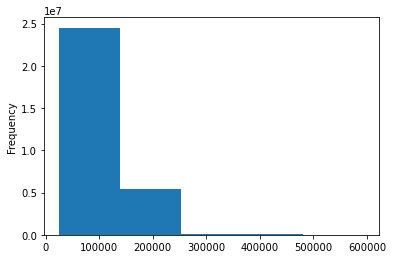

In [47]:
hist_income = ords_prods_cust_clean['Income'].plot.hist(bins = 5)

In [48]:
ords_prods_cust_clean.loc[ords_prods_cust_clean['Income'] <= 100000, 'Income_flag'] = 'Lower Income'

C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
ords_prods_cust_clean.loc[(ords_prods_cust_clean['Income'] > 100000) & (ords_prods_cust_clean['Income'] <= 300000), 'Income_flag'] = 'Average Income'

C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [50]:
ords_prods_cust_clean.loc[ords_prods_cust_clean['Income'] > 200000, 'Income_flag'] = 'Higher Income'

C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
ords_prods_cust_clean['Income_flag'].value_counts(dropna = False)

Lower Income      16297506
Average Income    13535799
Higher Income       246232
Name: Income_flag, dtype: int64

In [52]:
# change type to category
ords_prods_cust_clean['Income_flag'] = ords_prods_cust_clean['Income_flag'].astype('category')

<ipython-input-52-77a4abf31a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_clean['Income_flag'] = ords_prods_cust_clean['Income_flag'].astype('category')


In [170]:
#Incomeflag/time
crosstab_income_time = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['order_time'], dropna = False)

In [171]:
crosstab_income_time.to_clipboard()

In [172]:
crosstab_income_time

order_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Income_flag,,,,,,,,,,,,,,,,,,,,,,,,
Average Income,89561,47715,27127,20639,21805,37552,124272,385190,728300,1011091,1131093,1124593,1090532,1109485,1124635,1110435,1057510,873030,686013,534851,417311,342308,268417,172334
Higher Income,1224,860,857,514,693,1069,2936,7750,13464,19195,20970,21348,19926,19684,19451,21522,19376,16241,12964,9232,6993,4515,3253,2195
Lower Income,110456,58364,35434,26342,26331,43606,146646,448149,872813,1266701,1423338,1397493,1311188,1336305,1352452,1333341,1265485,1035672,806430,614645,478301,393746,316258,198010


In [56]:
#Incomeflag/day of week
crosstab_income_day_of_week = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['orders_day_of_week'], dropna = False)

In [57]:
crosstab_income_day_of_week.to_clipboard()

In [58]:
crosstab_income_day_of_week

orders_day_of_week,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Income_flag,,,,,,,
Average Income,2640827,2308714,1736501,1599133,1572737,1748027,1929860
Higher Income,39563,44408,32714,30741,32052,35562,31192
Lower Income,3048586,2902570,2142932,1942942,1924178,2142519,2193779


In [173]:
#Incomeflag/department
crosstab_income_department = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['department_id'], dropna = False)

In [174]:
crosstab_income_department.to_clipboard()

In [175]:
crosstab_income_department

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Income_flag,,,,,,,,,,,,,,,,,,,,,
Average Income,930990,14791,496159,4040135,60229,113339,1063242,41671,371021,13782,182138,317273,793154,279968,458772,2277482,296396,187849,1042060,437360,29302
Higher Income,19057,452,12140,47745,5922,1954,23793,1805,6649,25,3857,5940,15323,6304,8773,42708,11118,2037,22125,7044,312
Lower Income,1090690,18067,572679,4678970,72053,130749,1396661,46119,413809,18613,222747,327465,909106,359798,508732,2675931,366618,207284,1603809,521747,35655


In [62]:
#Incomeflag/Family status
crosstab_income_familiy_status = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['Family status'], dropna = False)

In [63]:
crosstab_income_familiy_status.to_clipboard()

In [64]:
crosstab_income_familiy_status

Family status,divorced/widowed,living with parents and siblings,married,single
Income_flag,,,,
Average Income,1770242,42108,10092204,1631245
Higher Income,23605,3889,179658,39080
Lower Income,778795,1394630,10848986,3275095


In [65]:
#Incomeflag/loyalty_flag
crosstab_income_loyalty_flag = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['loyalty_flag'], dropna = False)

In [66]:
crosstab_income_loyalty_flag.to_clipboard()

In [67]:
crosstab_income_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
Income_flag,,,
Average Income,4741332,1784688,7009779
Higher Income,101298,17391,127543
Lower Income,5638416,2278375,8380715


In [68]:
#Incomeflag/Age group
crosstab_income_age_group = pd.crosstab(ords_prods_cust_clean['Income_flag'], ords_prods_cust_clean['Age_Groups'], dropna = False)

In [69]:
crosstab_income_age_group.to_clipboard()

In [70]:
crosstab_income_age_group

Age_Groups,20 or less,20-30,30-40,40-50,50-60,60-70,over 70
Income_flag,,,,,,,
Average Income,27514,132043,136052,2951318,3218884,3184580,3885408
Higher Income,3484,16503,17636,60390,42050,49087,57082
Lower Income,915391,4558147,4556963,1733203,1439080,1391285,1703437


Family Members

In [71]:
#Family/order_time
crosstab_family_order_time = pd.crosstab(ords_prods_cust_clean['Family Members'], ords_prods_cust_clean['order_time'], dropna = False)

In [72]:
crosstab_family_order_time.to_clipboard()

In [176]:
crosstab_family_order_time

order_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Family Members,,,,,,,,,,,,,,,,,,,,,,,,
0,49737,26114,15765,12133,11818,20799,69333,214903,404429,573932,638314,633553,601238,612243,620836,619541,593225,481309,370766,290237,227607,185340,149093,95797
1,49537,26658,16722,11919,13104,21150,68449,207167,402844,578828,647145,634190,607115,615212,623762,618989,580847,477784,375898,286246,218768,180442,143733,92221
2,51848,26808,15352,11497,11603,19051,67142,209189,399687,575798,642110,637428,612608,620858,620929,607192,580566,479171,374172,289237,227697,190395,146907,94060
3,50119,27359,15579,11946,12304,21227,68930,209830,407617,568429,647832,638263,600685,617161,631011,619576,587733,486679,384571,293008,228533,184392,148195,90461


In [177]:
#Family/orders_day_of_week
crosstab_family_day_of_week = pd.crosstab(ords_prods_cust_clean['Family Members'], ords_prods_cust_clean['orders_day_of_week'], dropna = False)

In [178]:
crosstab_family_day_of_week.to_clipboard()

In [179]:
crosstab_family_day_of_week

orders_day_of_week,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Family Members,,,,,,,
0,1432001,1323295,974044,892100,881284,988099,1027239
1,1425794,1309490,969950,888286,884335,979709,1041166
2,1426992,1299120,977501,896382,883638,983221,1044451
3,1444189,1323787,990652,896048,879710,975079,1041975


In [180]:
#Family/department_id
crosstab_family_department_id = pd.crosstab(ords_prods_cust_clean['Family Members'], ords_prods_cust_clean['department_id'], dropna = False)

In [181]:
crosstab_family_department_id.to_clipboard()

In [182]:
crosstab_family_department_id

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Family Members,,,,,,,,,,,,,,,,,,,,,
0,508924,8417,271271,2197216,35363,61925,623484,22640,196655,7731,102273,159745,427570,160349,242193,1248720,165010,99731,665941,244030,16061
1,506266,8439,270253,2181193,34173,62235,616971,22930,197199,8334,101957,163111,429469,162924,244225,1252277,169216,96510,664170,238333,16161
2,513537,8337,269309,2179129,32987,60894,624513,21728,196836,8201,101916,162313,430456,161536,243755,1243816,170311,101342,670711,240650,16504
3,512010,8117,270145,2209312,35681,60988,618728,22297,200789,8154,102596,165509,430088,161261,246104,1251308,169595,99587,667172,243138,16543


additiona profiling variable

In [80]:
# Create flag for parental status

ords_prods_cust_clean.loc[ords_prods_cust_clean['Family Members'] > 0, 'Parental Status'] = 'Parent'
ords_prods_cust_clean.loc[ords_prods_cust_clean['Family Members'] <= 0, 'Parental Status'] = 'Not Parent'

C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\s.wienecke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [81]:
ords_prods_cust_clean.head()

,user_id,Gender,STATE,Age,date_joined,Family Members,Family status,Income,order_id,eval_set,...,loyalty_flag,mean_price,price_flag,median_order_frequency,order_frequency_flag,_merge,Regions,Age_Groups,Income_flag,Parental Status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,New customer,8.205882,Low spender,20.0,Regular customer,both,Midwest,40-50,Average Income,Parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,New customer,8.205882,Low spender,20.0,Regular customer,both,Midwest,40-50,Average Income,Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,New customer,8.205882,Low spender,20.0,Regular customer,both,Midwest,40-50,Average Income,Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,New customer,8.205882,Low spender,20.0,Regular customer,both,Midwest,40-50,Average Income,Parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,prior,...,New customer,8.205882,Low spender,20.0,Regular customer,both,Midwest,40-50,Average Income,Parent


In [82]:
ords_prods_cust_clean['Parental Status'].value_counts()

Parent        22561475
Not Parent     7518062
Name: Parental Status, dtype: int64

# 6. Task

In [83]:
#Age group/Parental Status
crosstab_age_parental = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['Parental Status'], dropna = False)

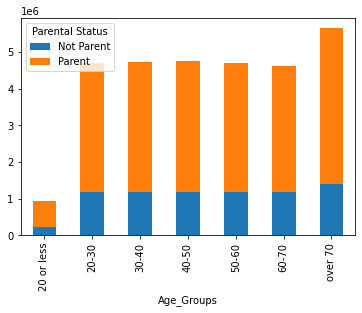

In [84]:
bar_age_parental = crosstab_age_parental.plot.bar(stacked = True)

In [85]:
bar_age_parental.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_parental.png'))

In [86]:
#Age group/Incomeflag
crosstab_age_group_income = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['Income_flag'], dropna = False)

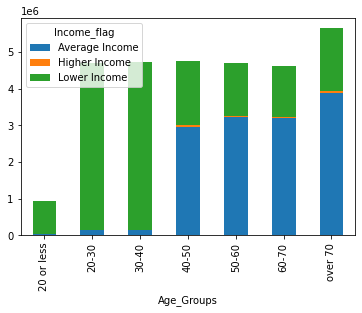

In [87]:
bar_age_group_income= crosstab_age_group_income.plot.bar(stacked = True)

In [88]:
bar_age_group_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_income.png'))

In [89]:
#Age group/order_frequency_flag
crosstab_age_group_order_frequency_flag = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['order_frequency_flag'], dropna = False)

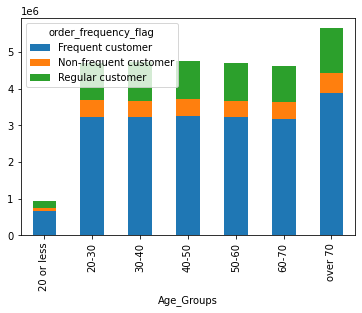

In [90]:
bar_age_group_order_frequency_flag= crosstab_age_group_order_frequency_flag.plot.bar(stacked = True)

In [91]:
bar_age_group_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_order_frequency_flag.png'))

In [92]:
# order time/age
crosstab_order_time_age = pd.crosstab(ords_prods_cust_clean['order_time'], ords_prods_cust_clean['Age_Groups'], dropna = False) 

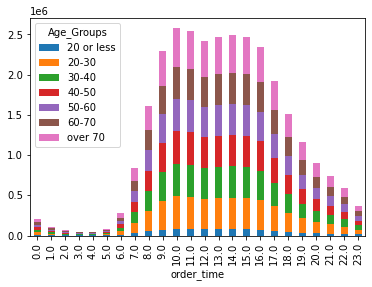

In [93]:
bar_order_time_age= crosstab_order_time_age.plot.bar(stacked = True)

In [94]:
bar_order_time_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_time_age.png'))

In [95]:
# Order time/Parental status

crosstab_order_time_parent = pd.crosstab(ords_prods_cust_clean['order_time'], ords_prods_cust_clean['Parental Status'], dropna = False) 

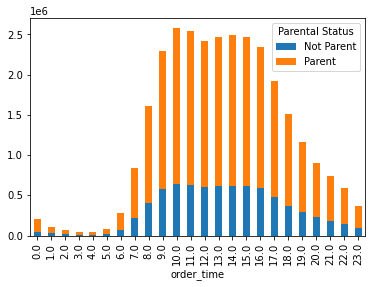

In [96]:
bar_order_time_parent= crosstab_order_time_parent.plot.bar(stacked = True)

In [97]:
bar_order_time_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_time_parent.png'))

In [98]:
#Parental statusorder_frequency_flag
crosstab_parent_order_frequency_flag = pd.crosstab(ords_prods_cust_clean['Parental Status'], ords_prods_cust_clean['order_frequency_flag'], dropna = False)

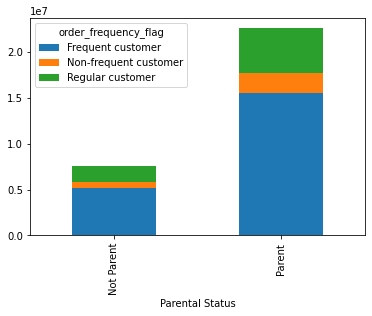

In [99]:
bar_parent_order_frequency_flag= crosstab_parent_order_frequency_flag.plot.bar(stacked = True)

In [100]:
bar_parent_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parent_order_frequency_flag.png'))

In [101]:
# Order time/Region
crosstab_order_time_region = pd.crosstab(ords_prods_cust_clean['order_time'], ords_prods_cust_clean['Regions'], dropna = False) 

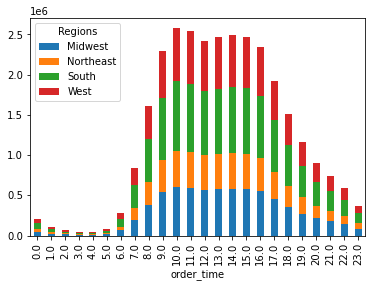

In [102]:
bar_order_time_region= crosstab_order_time_region.plot.bar(stacked = True)

In [103]:
bar_order_time_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_time_region.png'))

In [104]:
# day_of_week/region
crosstab_day_of_week_region= pd.crosstab(ords_prods_cust_clean['orders_day_of_week'], ords_prods_cust_clean['Regions'], dropna = False) 

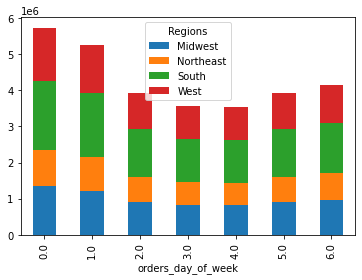

In [105]:
bar_day_of_week_region= crosstab_day_of_week_region.plot.bar(stacked = True)

In [106]:
bar_day_of_week_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_of_week_region.png'))

In [107]:
#Region/order_frequency_flag
crosstab_region_order_frequency_flag = pd.crosstab(ords_prods_cust_clean['Regions'], ords_prods_cust_clean['order_frequency_flag'], dropna = False)

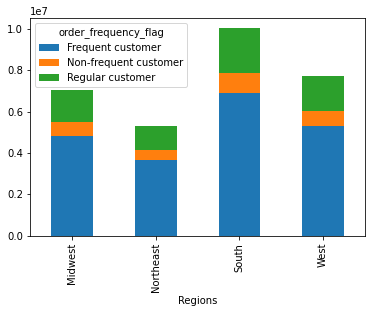

In [108]:
bar_region_order_frequency_flag= crosstab_region_order_frequency_flag.plot.bar(stacked = True)

In [109]:
bar_region_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_order_frequency_flag.png'))

In [110]:
#loyalty_flag/order_frequency_flag
crosstab_loyalty_flag_order_frequency_flag = pd.crosstab(ords_prods_cust_clean['loyalty_flag'], ords_prods_cust_clean['order_frequency_flag'], dropna = False)

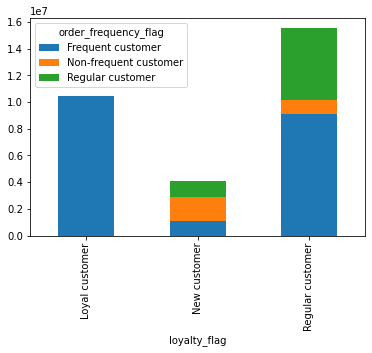

In [111]:
bar_loyalty_flag_order_frequency_flag= crosstab_loyalty_flag_order_frequency_flag.plot.bar(stacked = True)

In [112]:
bar_loyalty_flag_order_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_order_frequency_flag.png'))

In [113]:
# day_of_week/loyalty_flag
crosstab_day_of_week_loyalty_flag = pd.crosstab(ords_prods_cust_clean['orders_day_of_week'], ords_prods_cust_clean['loyalty_flag'], dropna = False) 

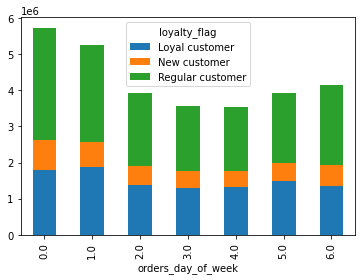

In [114]:
bar_day_of_week_loyalty_flag= crosstab_day_of_week_loyalty_flag.plot.bar(stacked = True)

In [115]:
bar_day_of_week_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_of_week_loyalty_flag.png'))

In [116]:
# age/price-flag
crosstab_age_price_flag = pd.crosstab(ords_prods_cust_clean['Age_Groups'], ords_prods_cust_clean['price_flag'], dropna = False) 

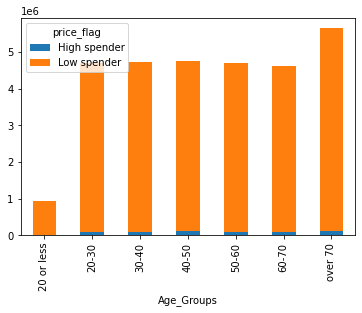

In [117]:
bar_age_price_flag = crosstab_age_price_flag.plot.bar(stacked = True)

In [118]:
bar_age_price_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_price_flag.png'))

In [119]:
# region/price-flag
crosstab_region_price_flag = pd.crosstab(ords_prods_cust_clean['Regions'], ords_prods_cust_clean['price_flag'], dropna = False) 

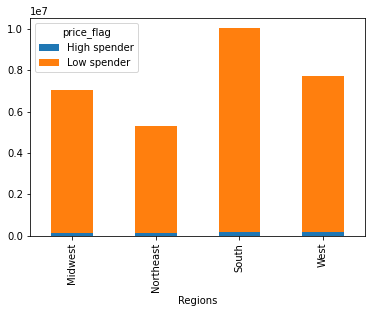

In [120]:
bar_region_price_flag = crosstab_region_price_flag.plot.bar(stacked = True)

In [121]:
bar_region_price_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_price_flag.png'))

# 7. Task

In [183]:
# Aggregate age & prices
aggr_age_price = ords_prods_cust_clean.groupby('Age').agg({'prices' : ['min', 'mean', 'max']})
aggr_age_price.to_clipboard()

In [184]:
aggr_age_price

prices                    
       min       mean      max
Age                           
18     1.0  11.109577  99999.0
19     1.0   9.566788  99999.0
20     1.0  10.839810  99999.0
21     1.0  16.480180  99999.0
22     1.0  10.818155  99999.0
23     1.0  14.550697  99999.0
24     1.0  13.892204  99999.0
25     1.0  10.453541  99999.0
26     1.0  11.560334  99999.0
27     1.0  11.217675  99999.0
28     1.0  15.739614  99999.0
29     1.0   9.852645  14900.0
30     1.0  10.534982  99999.0
31     1.0  12.670481  99999.0
32     1.0  11.771951  99999.0
33     1.0  11.641586  99999.0
34     1.0  13.498053  99999.0
35     1.0  11.266752  99999.0
36     1.0  10.089442  99999.0
37     1.0  11.654134  99999.0
38     1.0  13.849880  99999.0
39     1.0  12.168351  99999.0
40     1.0  12.522288  99999.0
41     1.0  10.992840  99999.0
42     1.0  10.331443  99999.0
43     1.0  12.138321  99999.0
44     1.0  10.344549  99999.0
45     1.0  17.859316  99999.0
46     1.0  10.810598  99999.0
47     1.0  10.702182  99999.0
48     1.0  12.164742  99999.0
49     1.0  14.486899  99999.0
50     1.0   9.062365  99999.0
51     1.0   9.930160  99999.0
52     1.0  11.368454  99999.0
53     1.0  11.963132  99999.0
54     1.0  11.482293  99999.0
55     1.0  12.567458  99999.0
56     1.0  12.203157  99999.0
57     1.0  17.029573  99999.0
58     1.0  11.767094  99999.0
59     1.0  11.631923  99999.0
60     1.0  10.079039  99999.0
61     1.0   9.514089  14900.0
62     1.0  13.321799  99999.0
63     1.0  13.294063  99999.0
64     1.0  12.474069  99999.0
65     1.0  10.558089  99999.0
66     1.0  13.500905  99999.0
67     1.0  11.895051  99999.0
68     1.0   9.686943  99999.0
69     1.0  11.788424  99999.0
70     1.0  12.994852  99999.0
71     1.0  10.931359  99999.0
72     1.0  11.482351  99999.0
73     1.0  10.443836  99999.0
74     1.0  10.657866  99999.0
75     1.0  13.504881  99999.0
76     1.0  14.258780  99999.0
77     1.0  12.934558  99999.0
78     1.0  12.658491  99999.0
79     1.0  12.037110  99999.0
80     1.0  10.686505  99999.0
81     1.0  10.181579  99999.0

In [124]:
# Aggregate age & income
aggr_age_income = ords_prods_cust_clean.groupby('Age').agg({'Income' : ['min', 'mean', 'max']})
aggr_age_income.to_clipboard()

In [185]:
aggr_age_income

Income                       
       min           mean     max
Age                              
18   26067   70619.854714  357226
19   25972   69851.398720  396364
20   26024   70930.199680  338939
21   25937   70662.688145  372571
22   26070   69927.149787  369192
23   26146   70977.991494  381379
24   26072   72057.950722  376599
25   26137   71202.781385  385324
26   26045   70616.099864  371450
27   25979   70712.585713  378234
28   26580   69586.096839  376208
29   26013   70427.463516  392552
30   25991   69571.566235  345689
31   26039   70218.295353  391967
32   25955   70227.551704  367501
33   26061   70821.045625  395178
34   25911   70878.409325  387860
35   25999   71438.172548  388874
36   26170   71192.814387  351375
37   26895   70435.568562  397929
38   26234   69905.520146  390410
39   25903   70909.623971  382018
40   26154   71009.559087  395360
41   29017  116769.882108  551849
42   29081  116878.820213  549286
43   29666  117132.930668  592409
44   29076  115066.381062  567729
45   29082  117734.218993  569810
46   29053  115739.935599  505360
47   29044  115493.593307  584097
48   29734  117700.599494  536156
49   29641  117097.891830  559700
50   29520  116284.410338  574425
51   29085  115005.557286  528184
52   29468  114515.076867  526894
53   29523  114985.830884  518856
54   29685  115336.438283  531126
55   29018  112962.747534  591089
56   29488  117343.286122  525892
57   29053  116150.624043  579397
58   29075  116027.736308  462969
59   29161  114623.483553  573617
60   29192  115376.749608  578251
61   29636  116297.345647  441855
62   29057  115578.886804  552776
63   29455  117085.053949  545128
64   29134  116809.354414  573849
65   29173  116986.472903  577728
66   29050  115212.215455  350982
67   29189  115436.894433  443761
68   29011  116012.906338  540239
69   29298  116008.326189  478964
70   29001  113533.240449  404016
71   29327  114786.828954  558033
72   29484  117575.358328  556641
73   29318  115260.876498  421524
74   29230  115001.768107  497926
75   29040  118138.926313  593901
76   29302  115100.237608  578551
77   30031  116837.769325  512331
78   29113  117399.825555  381735
79   29330  115405.586131  579169
80   30173  114291.580035  569253
81   29738  115286.479309  571932

In [126]:
# Aggregate age & max_order
aggr_age_max_order = ords_prods_cust_clean.groupby('Age').agg({'max_order' : ['min', 'mean', 'max']})
aggr_age_max_order.to_clipboard()

In [186]:
aggr_age_max_order

max_order                  
          min       mean    max
Age                            
18        5.0  35.547639  100.0
19        5.0  35.968354  100.0
20        5.0  34.568407  100.0
21        5.0  36.982243  100.0
22        5.0  37.091128  100.0
23        5.0  36.964065  100.0
24        5.0  34.316656  100.0
25        5.0  33.816557  100.0
26        5.0  35.153489  100.0
27        5.0  35.964093  100.0
28        5.0  34.587238  100.0
29        5.0  34.983370  100.0
30        5.0  33.587778  100.0
31        5.0  36.228662  100.0
32        5.0  34.455828  100.0
33        5.0  36.067166  100.0
34        5.0  37.610249  100.0
35        5.0  34.852268  100.0
36        5.0  36.486262  100.0
37        5.0  36.335497  100.0
38        5.0  36.563710  100.0
39        5.0  35.784012  100.0
40        5.0  35.575120  100.0
41        5.0  35.148389  100.0
42        5.0  36.064435  100.0
43        5.0  35.370844  100.0
44        5.0  34.833686  100.0
45        5.0  35.515363  100.0
46        5.0  34.253564  100.0
47        5.0  35.291493  100.0
48        5.0  36.570945  100.0
49        5.0  36.908516  100.0
50        5.0  35.753017  100.0
51        5.0  35.355121  100.0
52        5.0  36.075748  100.0
53        5.0  35.367398  100.0
54        5.0  35.195739  100.0
55        5.0  33.980055  100.0
56        5.0  35.924335  100.0
57        5.0  37.086355  100.0
58        5.0  35.605770  100.0
59        5.0  35.608515  100.0
60        5.0  34.655392  100.0
61        5.0  35.774798  100.0
62        5.0  35.556940  100.0
63        5.0  35.078567  100.0
64        5.0  36.865169  100.0
65        5.0  35.114709  100.0
66        5.0  35.040036  100.0
67        5.0  34.607157  100.0
68        5.0  35.693836  100.0
69        5.0  36.871719  100.0
70        5.0  34.801480  100.0
71        5.0  35.528307  100.0
72        5.0  35.244524  100.0
73        5.0  35.752984  100.0
74        5.0  35.325197  100.0
75        5.0  36.661767  100.0
76        5.0  34.260774  100.0
77        5.0  35.383986  100.0
78        5.0  34.618781  100.0
79        5.0  35.822709  100.0
80        5.0  36.091867  100.0
81        5.0  36.079700  100.0

In [128]:
# Aggregate age & department_id
aggr_age_department_id = ords_prods_cust_clean.groupby('Age').agg({'department_id' : ['min', 'mean', 'max']})
aggr_age_department_id.to_clipboard()

In [188]:
aggr_age_department_id

department_id                 
              min       mean   max
Age                               
18            1.0   9.951607  21.0
19            1.0   9.909755  21.0
20            1.0   9.904483  21.0
21            1.0   9.962240  21.0
22            1.0   9.885680  21.0
23            1.0   9.940179  21.0
24            1.0   9.928875  21.0
25            1.0   9.954849  21.0
26            1.0  10.008182  21.0
27            1.0   9.904519  21.0
28            1.0   9.998918  21.0
29            1.0   9.940968  21.0
30            1.0   9.883856  21.0
31            1.0   9.909654  21.0
32            1.0   9.964059  21.0
33            1.0   9.994721  21.0
34            1.0   9.897428  21.0
35            1.0  10.002449  21.0
36            1.0   9.908475  21.0
37            1.0   9.948981  21.0
38            1.0   9.860337  21.0
39            1.0   9.946745  21.0
40            1.0   9.868497  21.0
41            1.0   9.934776  21.0
42            1.0   9.919740  21.0
43            1.0   9.892897  21.0
44            1.0   9.954596  21.0
45            1.0   9.926438  21.0
46            1.0   9.922717  21.0
47            1.0   9.944173  21.0
48            1.0   9.892235  21.0
49            1.0   9.988026  21.0
50            1.0   9.888165  21.0
51            1.0   9.892295  21.0
52            1.0   9.947091  21.0
53            1.0   9.935749  21.0
54            1.0   9.933250  21.0
55            1.0   9.947985  21.0
56            1.0   9.927058  21.0
57            1.0   9.924392  21.0
58            1.0   9.855165  21.0
59            1.0   9.931711  21.0
60            1.0   9.846108  21.0
61            1.0   9.954398  21.0
62            1.0   9.950069  21.0
63            1.0   9.855820  21.0
64            1.0   9.982277  21.0
65            1.0   9.842171  21.0
66            1.0   9.923643  21.0
67            1.0   9.886403  21.0
68            1.0   9.873156  21.0
69            1.0   9.846805  21.0
70            1.0   9.925039  21.0
71            1.0   9.917092  21.0
72            1.0   9.931299  21.0
73            1.0   9.903845  21.0
74            1.0   9.993491  21.0
75            1.0   9.924085  21.0
76            1.0   9.959044  21.0
77            1.0   9.948461  21.0
78            1.0   9.850971  21.0
79            1.0   9.877531  21.0
80            1.0   9.938390  21.0
81            1.0   9.896123  21.0

In [130]:
# Aggregate age & orders_day_of_week
aggr_age_orders_day_of_week = ords_prods_cust_clean.groupby('Age').agg({'orders_day_of_week' : ['min', 'mean', 'max']})
aggr_age_orders_day_of_week.to_clipboard()

In [189]:
aggr_age_orders_day_of_week

orders_day_of_week               
                   min      mean  max
Age                                  
18                 0.0  2.729001  6.0
19                 0.0  2.757538  6.0
20                 0.0  2.757798  6.0
21                 0.0  2.723452  6.0
22                 0.0  2.733694  6.0
23                 0.0  2.734133  6.0
24                 0.0  2.759340  6.0
25                 0.0  2.758968  6.0
26                 0.0  2.739018  6.0
27                 0.0  2.722252  6.0
28                 0.0  2.729768  6.0
29                 0.0  2.751506  6.0
30                 0.0  2.707738  6.0
31                 0.0  2.710191  6.0
32                 0.0  2.678098  6.0
33                 0.0  2.748471  6.0
34                 0.0  2.735900  6.0
35                 0.0  2.728192  6.0
36                 0.0  2.735581  6.0
37                 0.0  2.748989  6.0
38                 0.0  2.747680  6.0
39                 0.0  2.709455  6.0
40                 0.0  2.733444  6.0
41                 0.0  2.761213  6.0
42                 0.0  2.734604  6.0
43                 0.0  2.745922  6.0
44                 0.0  2.735755  6.0
45                 0.0  2.738685  6.0
46                 0.0  2.745914  6.0
47                 0.0  2.751513  6.0
48                 0.0  2.765095  6.0
49                 0.0  2.773821  6.0
50                 0.0  2.738841  6.0
51                 0.0  2.741600  6.0
52                 0.0  2.750155  6.0
53                 0.0  2.753685  6.0
54                 0.0  2.732294  6.0
55                 0.0  2.752717  6.0
56                 0.0  2.737702  6.0
57                 0.0  2.743903  6.0
58                 0.0  2.741855  6.0
59                 0.0  2.706218  6.0
60                 0.0  2.756792  6.0
61                 0.0  2.753971  6.0
62                 0.0  2.765183  6.0
63                 0.0  2.712104  6.0
64                 0.0  2.750221  6.0
65                 0.0  2.720089  6.0
66                 0.0  2.751662  6.0
67                 0.0  2.752582  6.0
68                 0.0  2.769559  6.0
69                 0.0  2.763877  6.0
70                 0.0  2.781767  6.0
71                 0.0  2.756262  6.0
72                 0.0  2.731380  6.0
73                 0.0  2.744910  6.0
74                 0.0  2.722509  6.0
75                 0.0  2.749500  6.0
76                 0.0  2.726236  6.0
77                 0.0  2.716682  6.0
78                 0.0  2.757206  6.0
79                 0.0  2.748862  6.0
80                 0.0  2.746408  6.0
81                 0.0  2.768899  6.0

In [132]:
# Aggregate regions & prices
aggr_region_price = ords_prods_cust_clean.groupby('Regions').agg({'prices' : ['min', 'mean', 'max']})
aggr_region_price.to_clipboard()

In [191]:
aggr_region_price

prices                    
             min       mean      max
Regions                             
Midwest      1.0  12.819963  99999.0
Northeast    1.0  11.492175  99999.0
South        1.0  12.147142  99999.0
West         1.0  11.270091  99999.0

In [134]:
# Aggregate regions & income
aggr_region_income = ords_prods_cust_clean.groupby('Regions').agg({'Income' : ['min', 'mean', 'max']})
aggr_region_income.to_clipboard()

In [135]:
aggr_region_income

Income                       
             min           mean     max
Regions                                
Midwest    25903  100314.957104  579397
Northeast  26072   99678.430133  584097
South      25911   99150.497284  591089
West       25937   99470.158781  593901

In [136]:
# Aggregate regions & max_order
aggr_region_max_order = ords_prods_cust_clean.groupby('Regions').agg({'max_order' : ['min', 'mean', 'max']})
aggr_region_max_order.to_clipboard()

In [137]:
aggr_region_max_order

max_order                  
                min       mean    max
Regions                              
Midwest         5.0  35.085995  100.0
Northeast       5.0  35.747805  100.0
South           5.0  35.626937  100.0
West            5.0  35.841195  100.0

In [138]:
# Aggregate regions & department_id
aggr_region_department_id = ords_prods_cust_clean.groupby('Regions').agg({'department_id' : ['min', 'mean', 'max']})
aggr_region_department_id.to_clipboard()

In [192]:
aggr_region_department_id

department_id                
                    min      mean   max
Regions                                
Midwest             1.0  9.917459  21.0
Northeast           1.0  9.943847  21.0
South               1.0  9.911736  21.0
West                1.0  9.927679  21.0

In [140]:
# Aggregate regions & orders_day_of_week
aggr_region_orders_day_of_week = ords_prods_cust_clean.groupby('Regions').agg({'orders_day_of_week' : ['min', 'mean', 'max']})
aggr_region_orders_day_of_week.to_clipboard()

In [141]:
aggr_region_orders_day_of_week

orders_day_of_week               
                         min      mean  max
Regions                                    
Midwest                  0.0  2.740932  6.0
Northeast                0.0  2.737870  6.0
South                    0.0  2.744917  6.0
West                     0.0  2.741478  6.0

# 8. Task

In 6.Task I already did some analysis with Regions, but here are some additional visualizations.

In [142]:
#Family status/region
crosstab_family_region = pd.crosstab(ords_prods_cust_clean['Family status'], ords_prods_cust_clean['Regions'], dropna = False)

In [143]:
stacked_family_region= crosstab_family_region.T.apply(lambda x: x*100/sum(x), axis = 1)

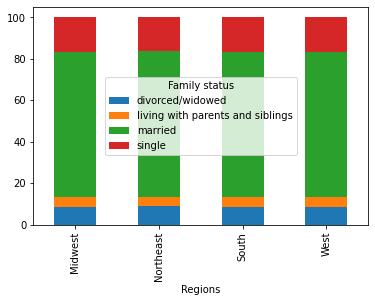

In [144]:
bar_family_region = stacked_family_region.plot.bar(stacked = True)

In [145]:
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_region.png'))

In [146]:
#price_flag/region
crosstab_family_price_flag = pd.crosstab(ords_prods_cust_clean['price_flag'], ords_prods_cust_clean['Regions'], dropna = False)

In [147]:
stacked_family_price_flag= crosstab_family_price_flag.T.apply(lambda x: x*100/sum(x), axis = 1)

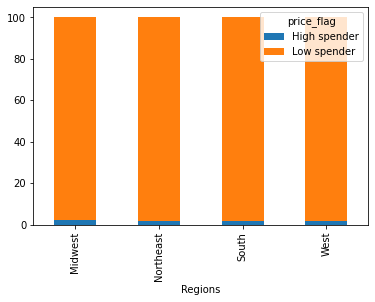

In [148]:
bar_family_price_flag = stacked_family_price_flag.plot.bar(stacked = True)

In [149]:
bar_family_price_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_price_flag.png'))

In [150]:
#price_range_loc/ordertime
crosstab_price_range_order_time = pd.crosstab(ords_prods_cust_clean['order_time'], ords_prods_cust_clean['price_range_loc'], dropna = False)

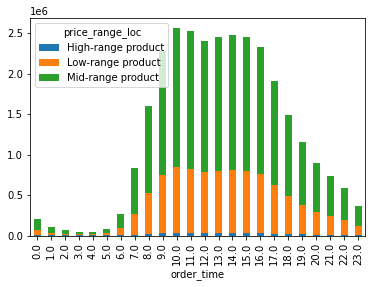

In [151]:
bar_price_range_order_time = crosstab_price_range_order_time.plot.bar(stacked = True)

In [152]:
bar_price_range_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_order_time.png'))

In [153]:
#price/day_of_week
crosstab_price_day_of_week = pd.crosstab(ords_prods_cust_clean['orders_day_of_week'], ords_prods_cust_clean['price_range_loc'], dropna = False)

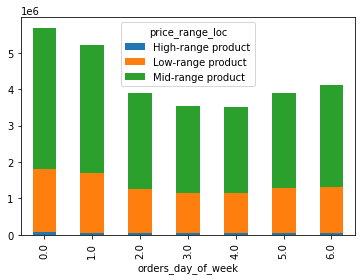

In [154]:
bar_price_day_of_week = crosstab_price_day_of_week.plot.bar(stacked = True)

In [155]:
bar_price_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_day_of_week.png'))

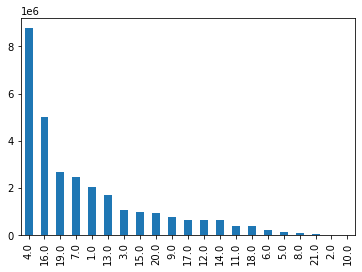

In [156]:
#value_counts for dept_id
bar_dept = ords_prods_cust_clean['department_id'].value_counts().plot.bar()

In [157]:
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept.png'))

# 10. Task

In [158]:
ords_prods_cust_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_clean.pkl'))